<a href="https://colab.research.google.com/github/SammyXu129/DataScience-Customer_Churn_Model/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem
We will develop a machine learning model that can predict customers who will leave the company, using Logisitic Regression and Random Forest

Resource:
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# importing method to perform cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#importing methods for model evaluation
from sklearn import metrics

In [35]:
telco_df = pd.read_excel("/content/02 Churn-Dataset.xlsx")
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


## EDA

In [36]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['Churn'] = telco_df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].astype('object')


In [38]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [39]:
telco_df.dropna(inplace = True)

In [40]:
telco_df.drop(['customerID'], axis = 1, inplace = True)

In [41]:
telco_df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
numAdminTickets       int64
numTechTickets        int64
Churn                 int64
dtype: object

In [42]:
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
telco_df['Churn'] = telco_df['Churn'].map({0: 'No', 1: 'Yes'})

### Multivariable Analysis

In [43]:
def grab_col(df):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

    num_cols = [col for col in df.columns if df[col].dtypes == "int64" or df[col].dtypes == "float64"]


    return cat_cols, num_cols

cat_cols, num_cols = grab_col(telco_df)


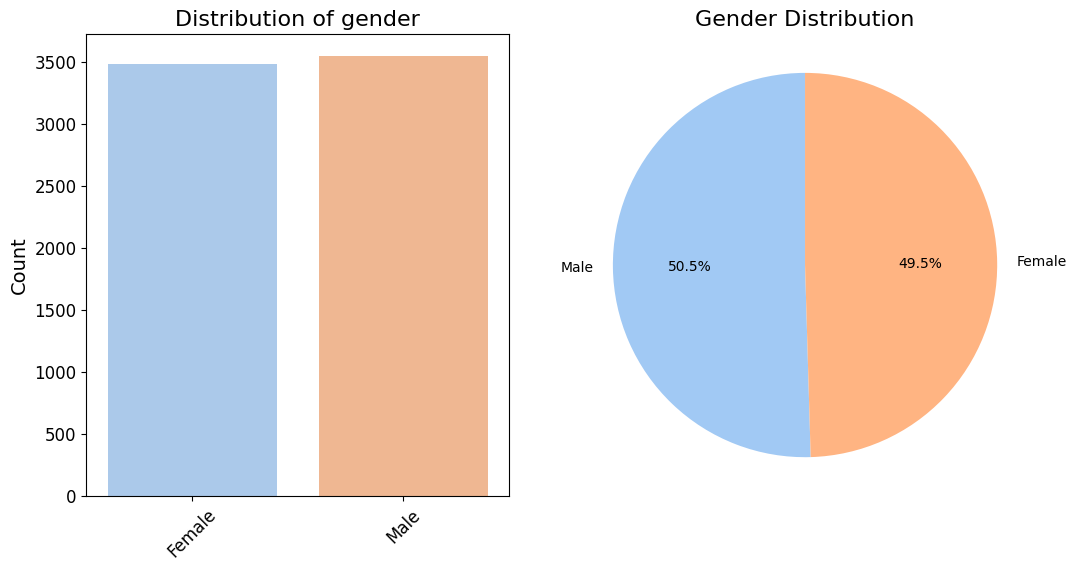

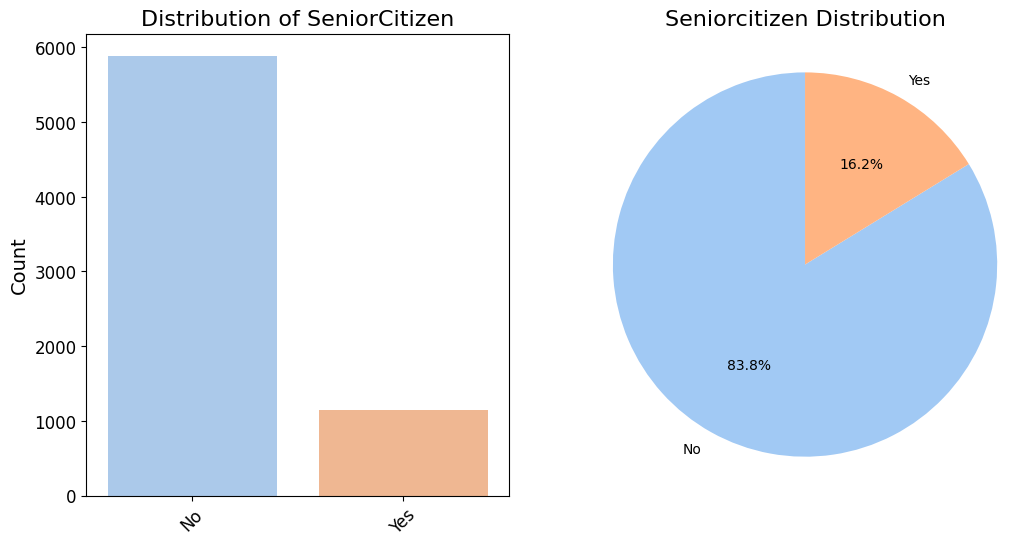

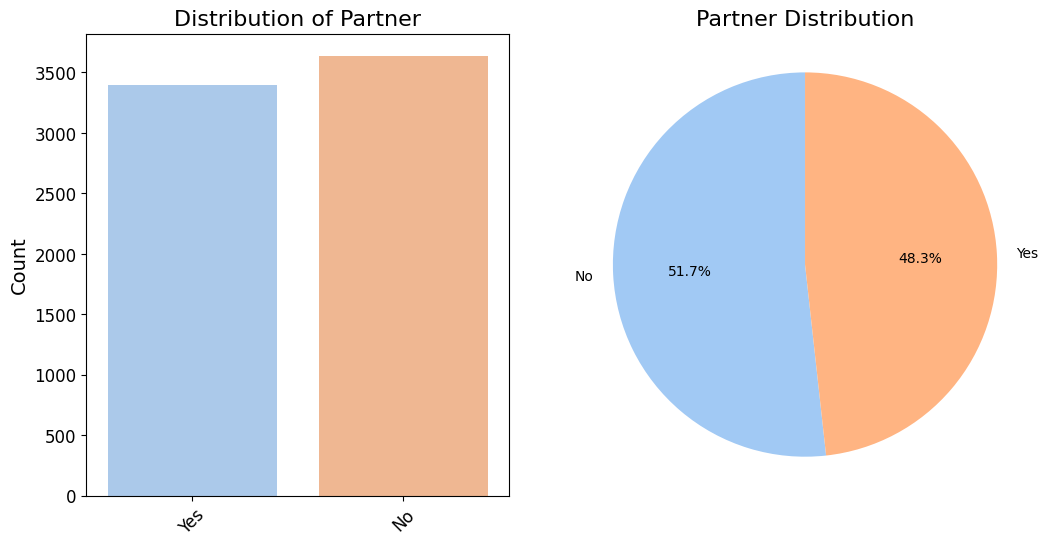

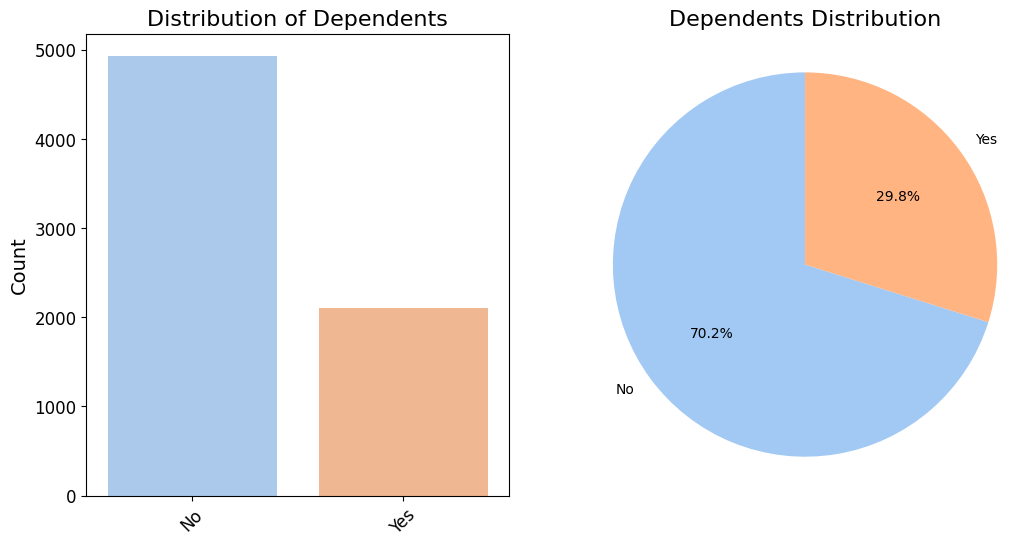

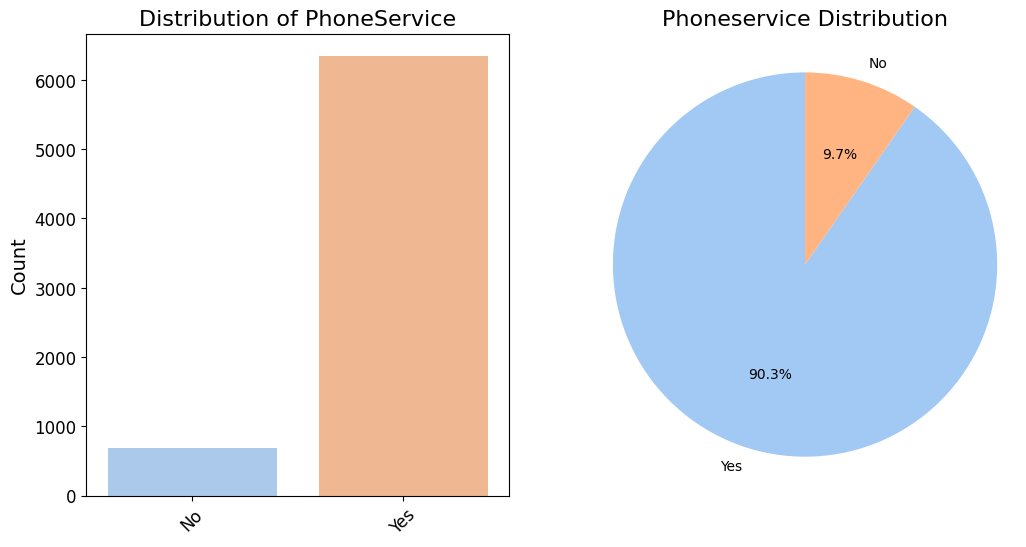

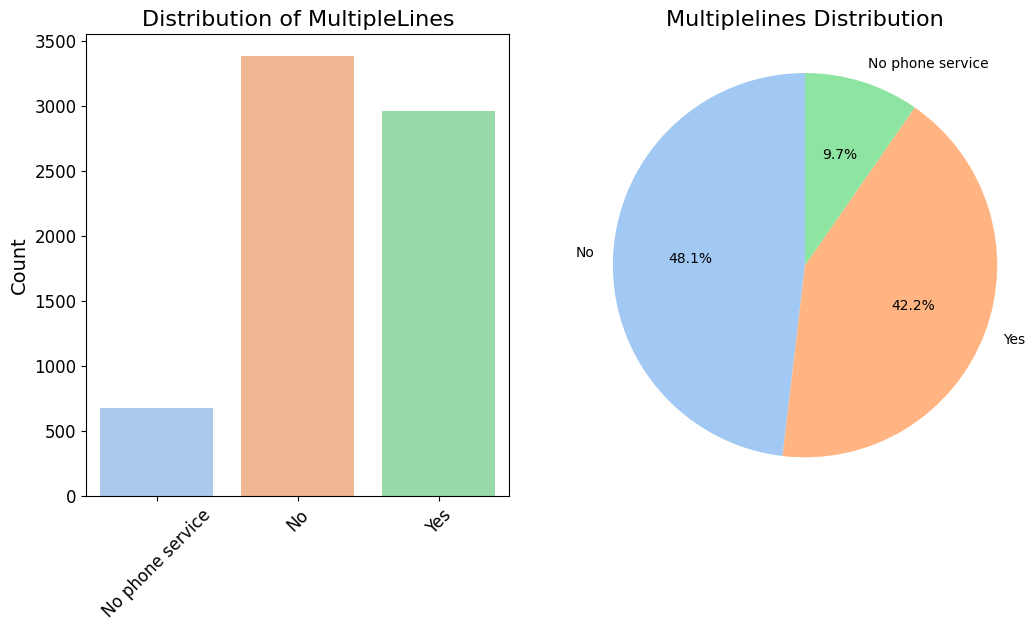

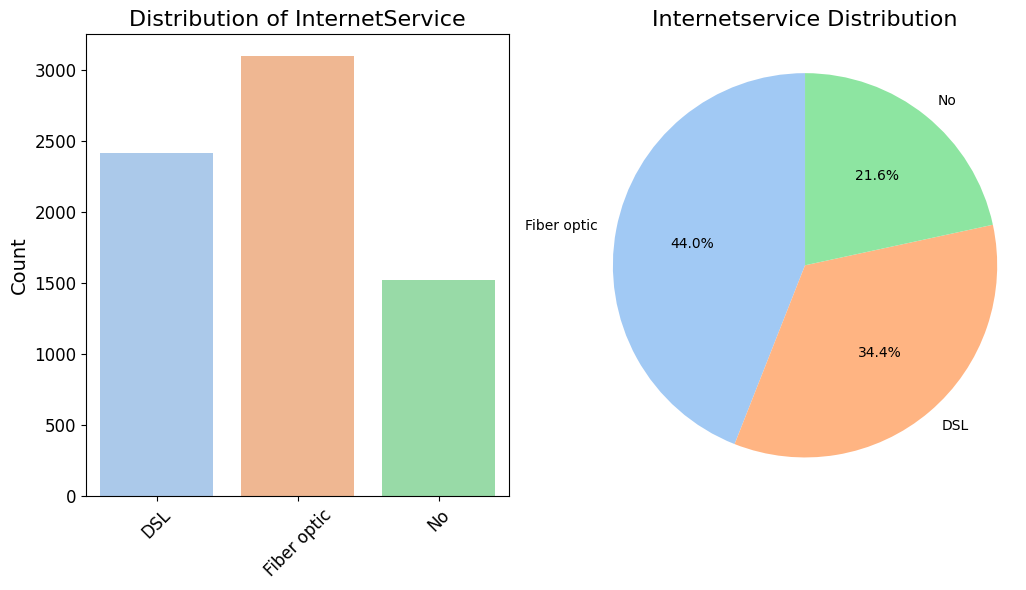

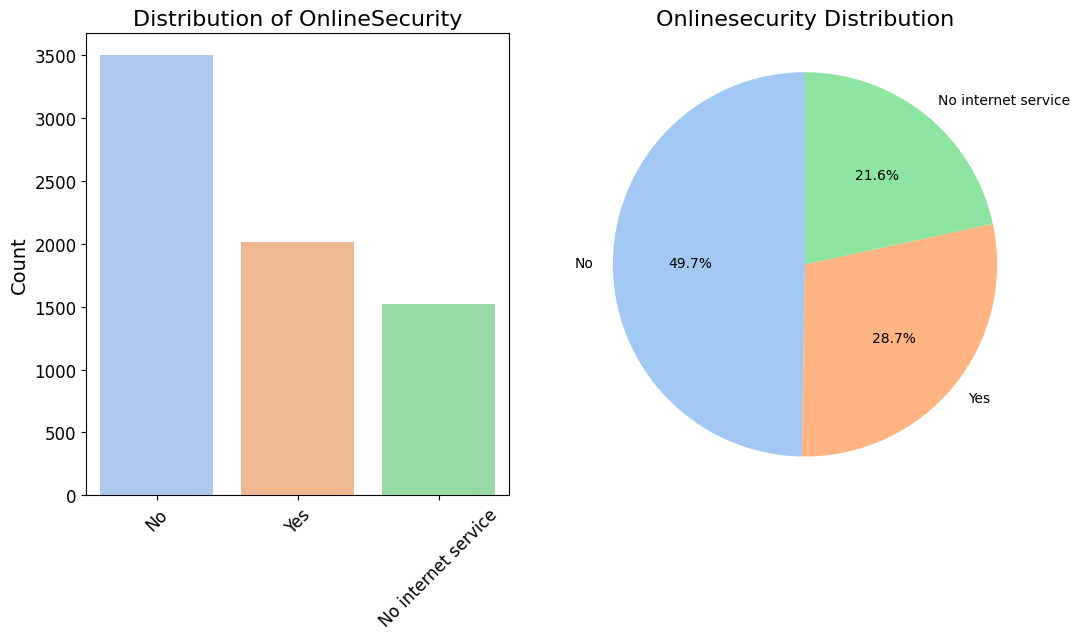

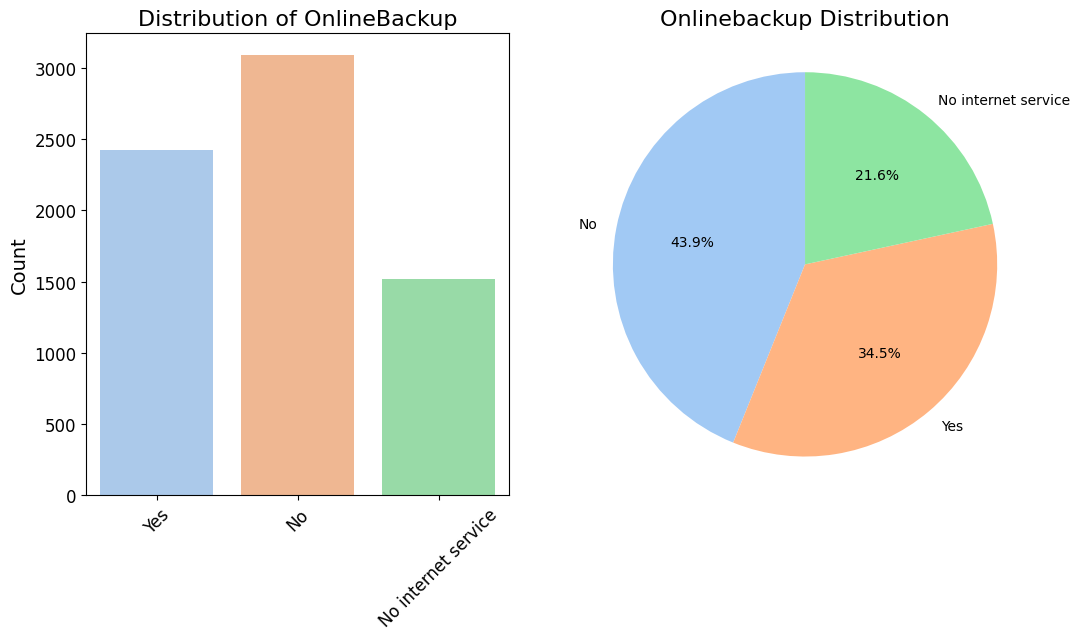

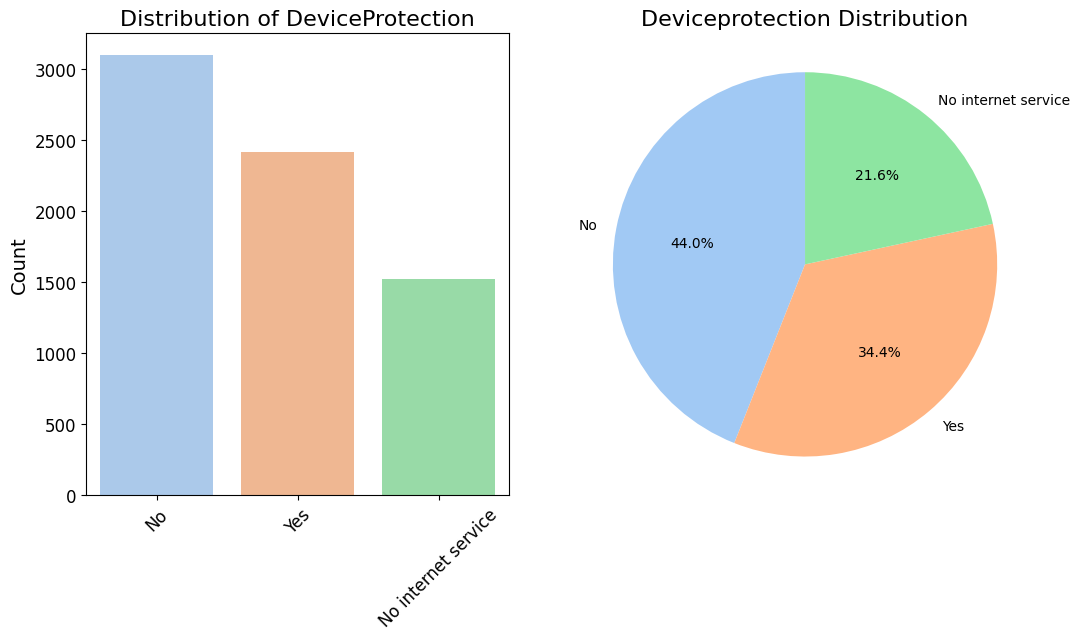

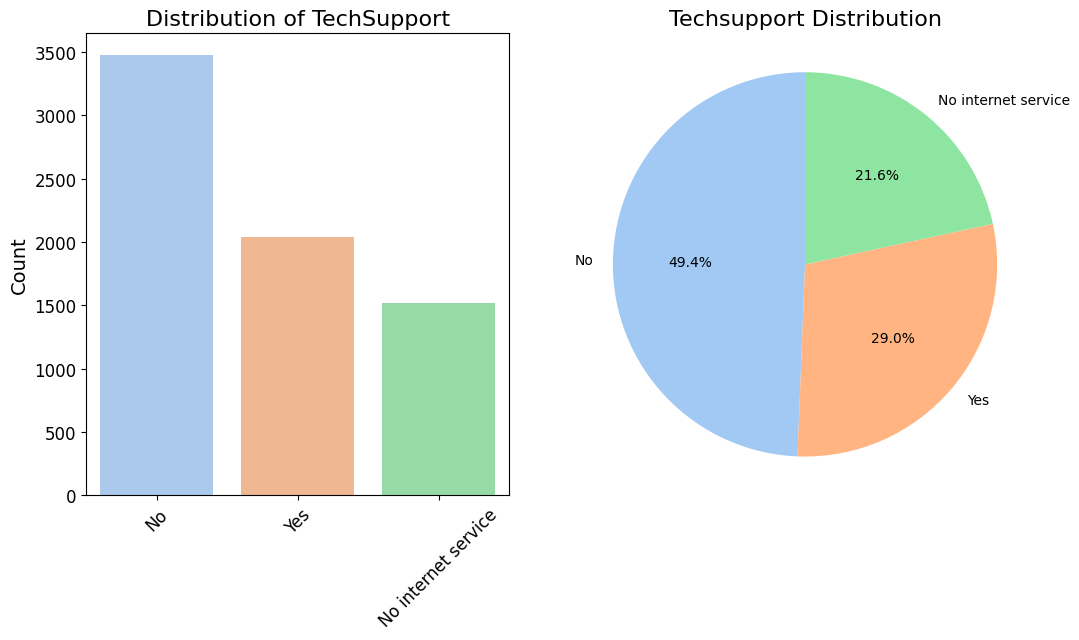

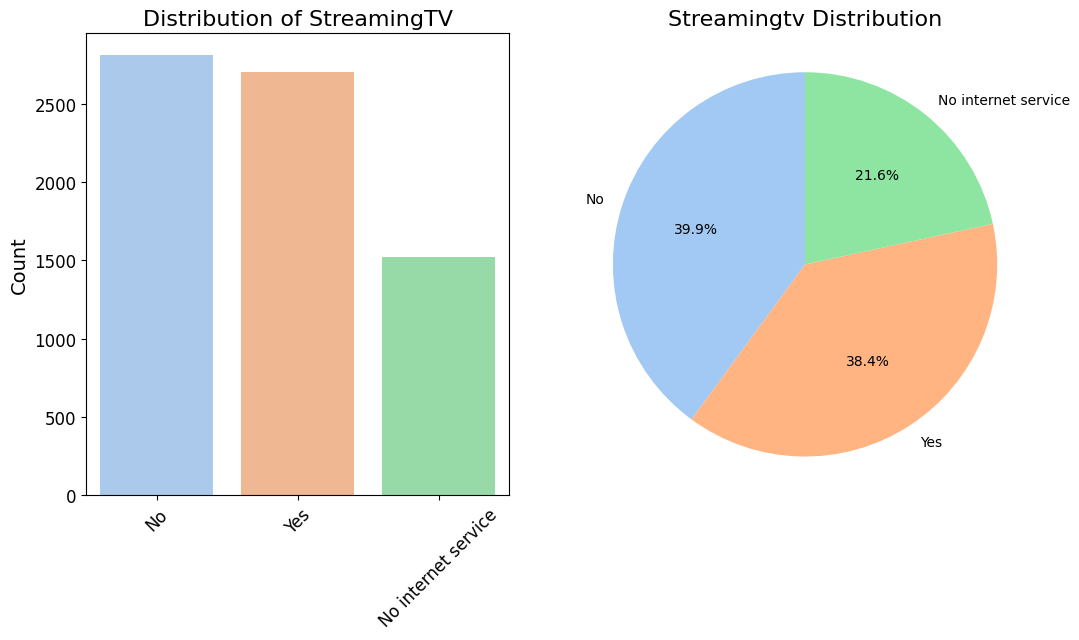

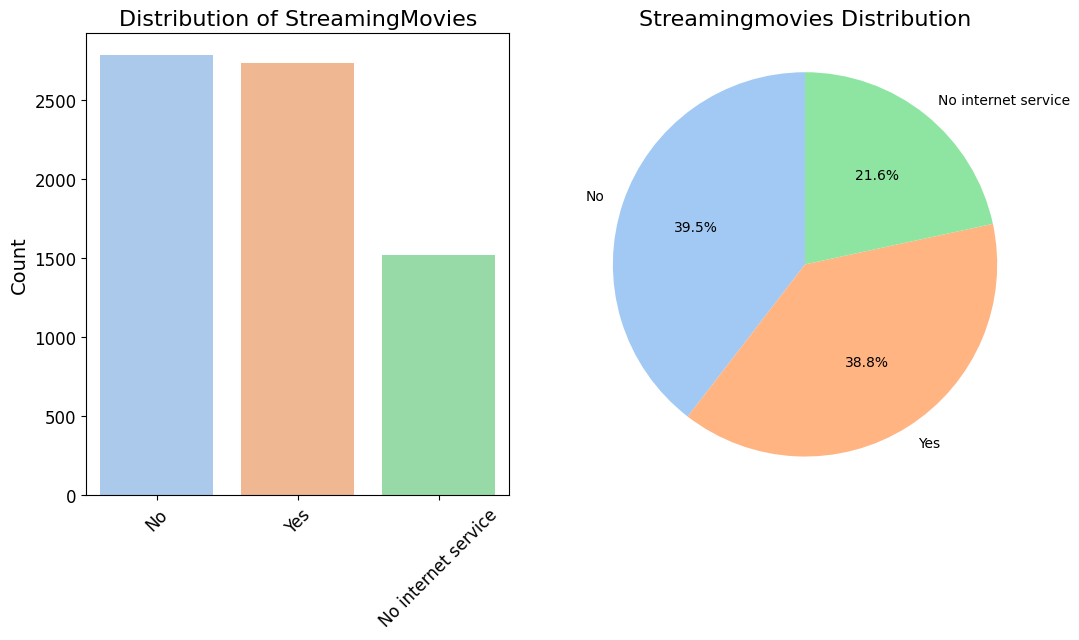

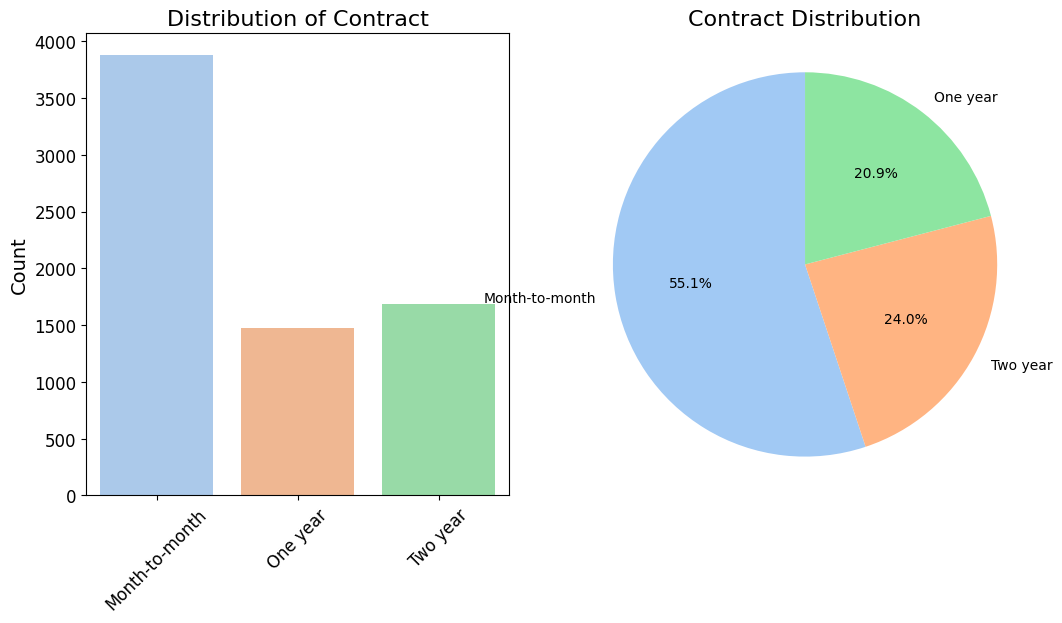

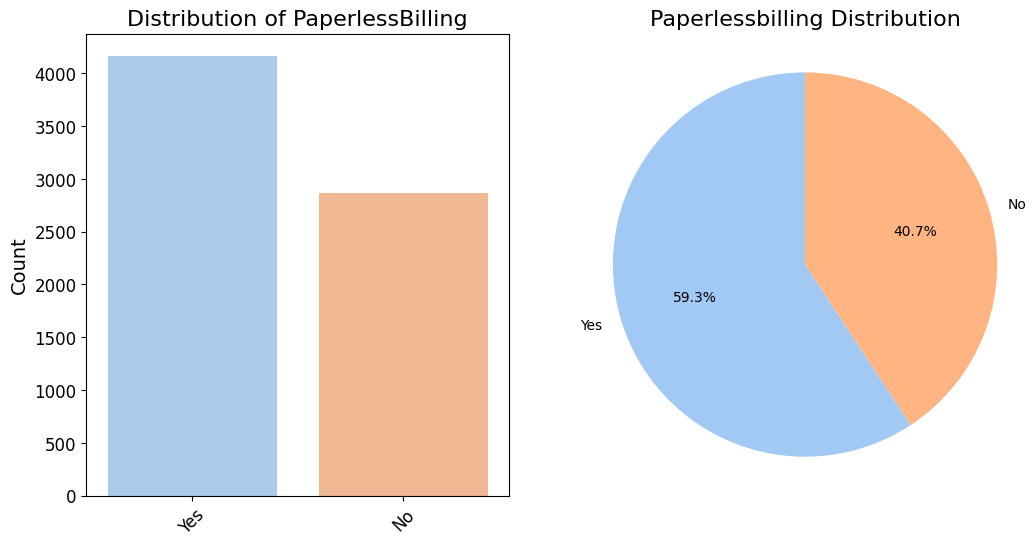

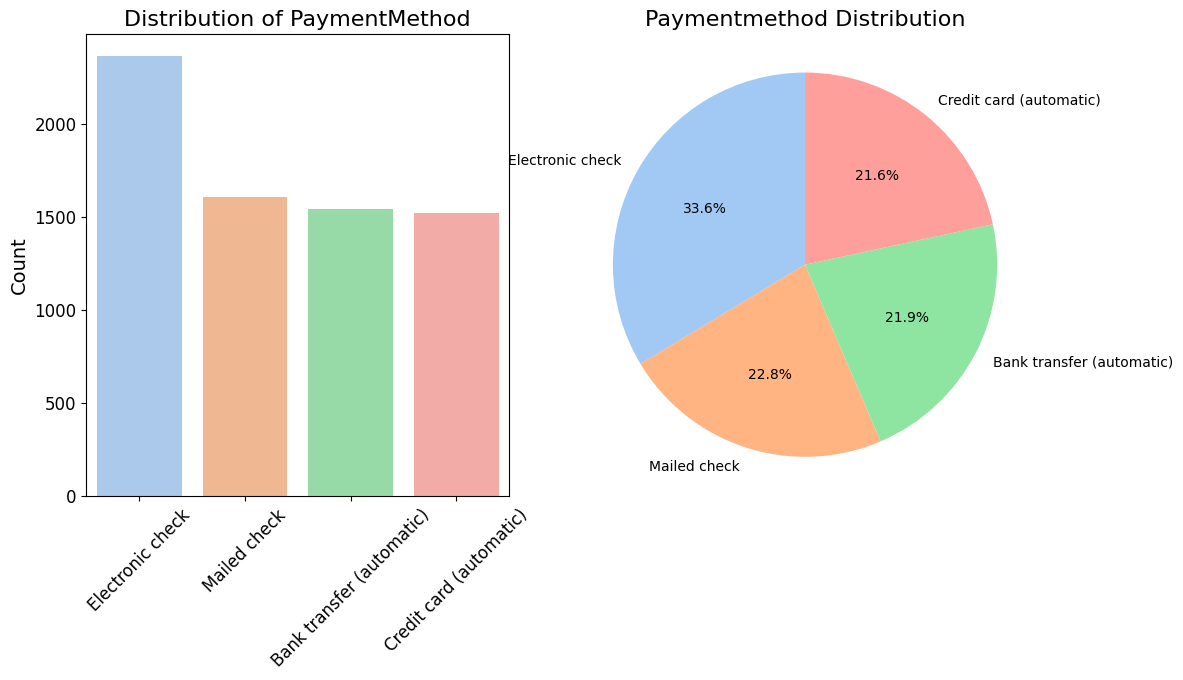

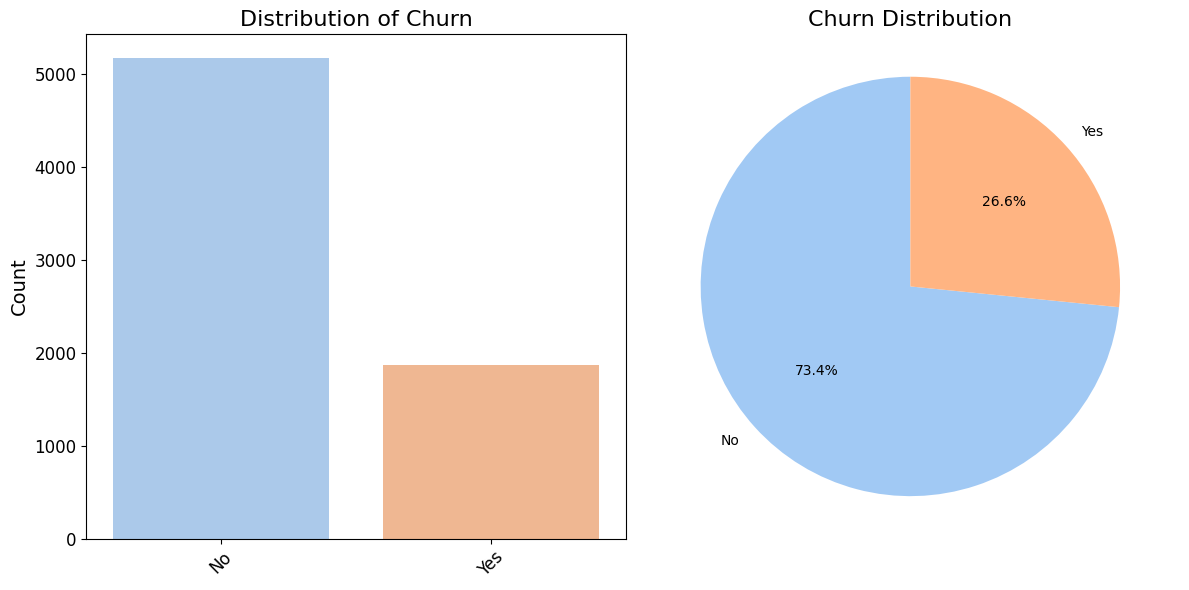

In [44]:
import warnings
warnings.filterwarnings('ignore')
for col in cat_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  colors = sns.color_palette('pastel')

  sns.countplot(x = col, data =  telco_df, ax =ax1, palette=colors)
  ax1.set_title(f'Distribution of {col}', fontsize=16)
  ax1.set_xlabel('')
  ax1.set_ylabel('Count', fontsize=14)
  ax1.tick_params(axis='x', labelsize=12)
  ax1.tick_params(axis='y', labelsize=12)
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


  values = telco_df[col].value_counts()
  ax2.pie(x = values, labels = values.index,autopct='%1.1f%%', startangle=90, colors=[colors[0], colors[1], colors[2],colors[3]])
  ax2.set_title(f'{col.capitalize()} Distribution', fontsize=16)
  ax2.axis('equal')

plt.tight_layout()
plt.show()


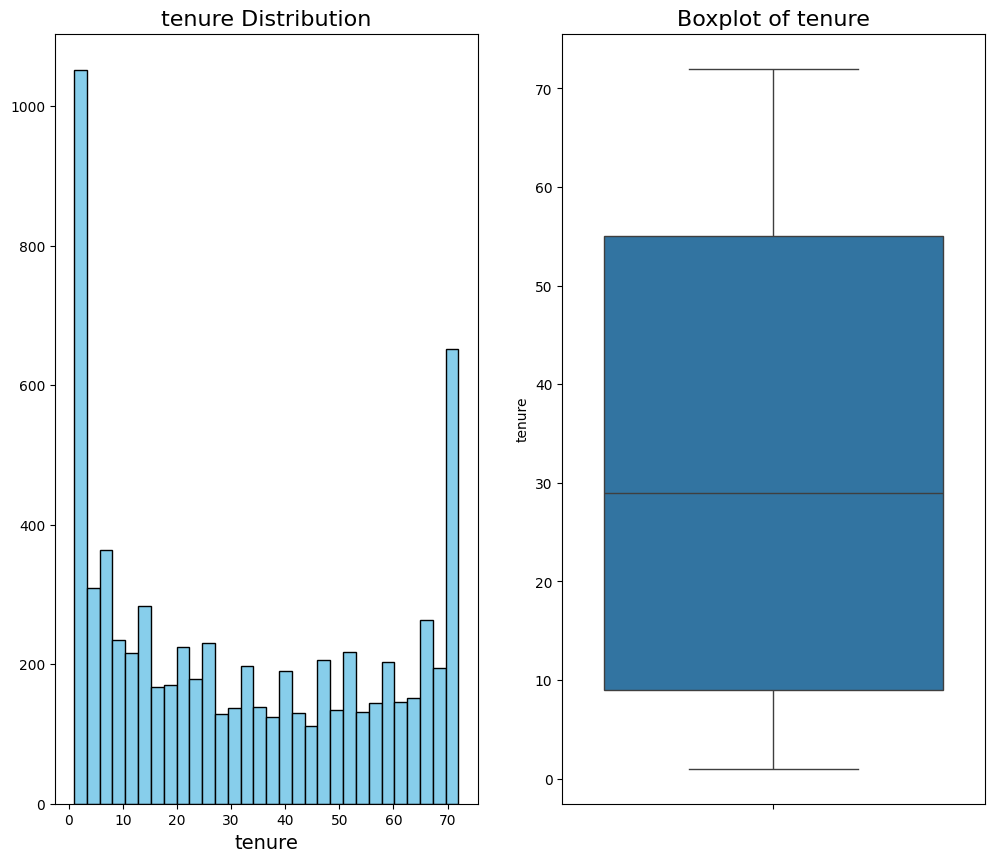

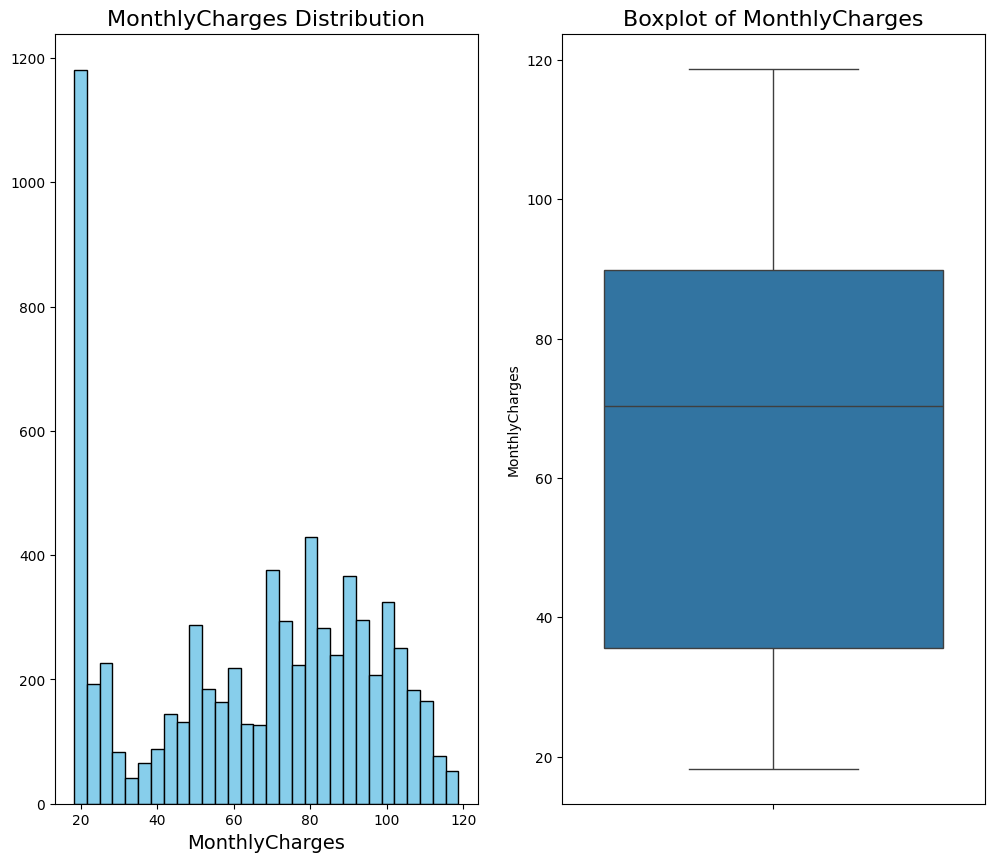

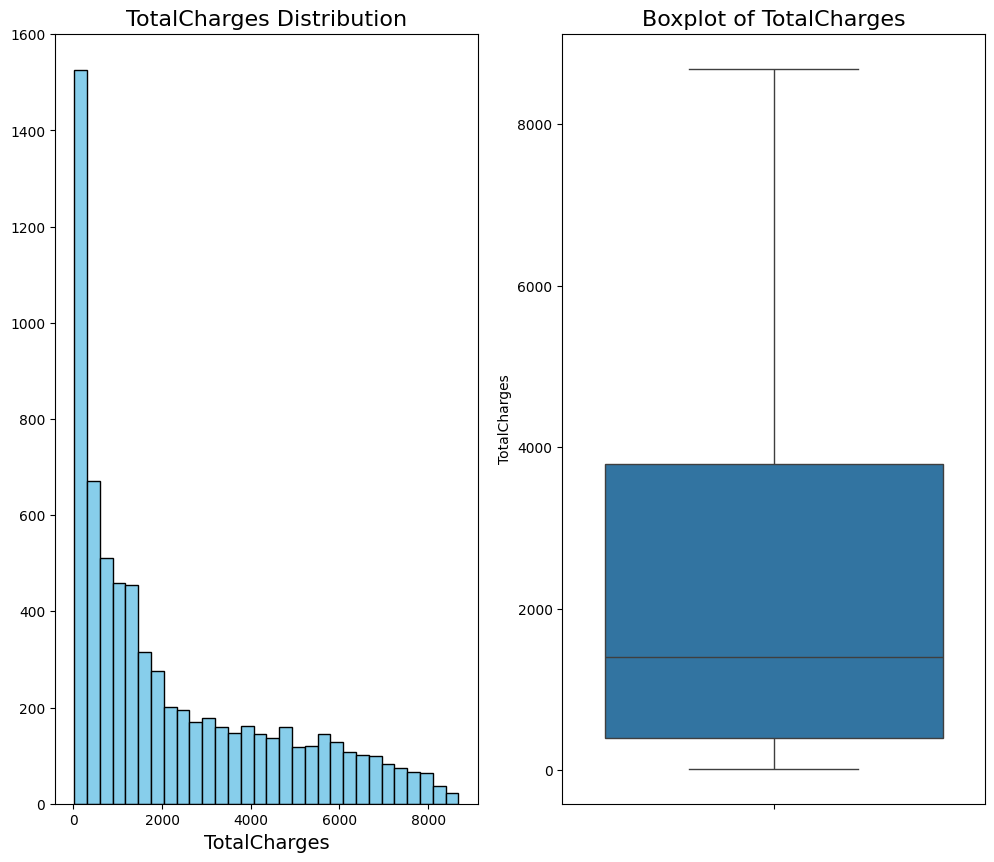

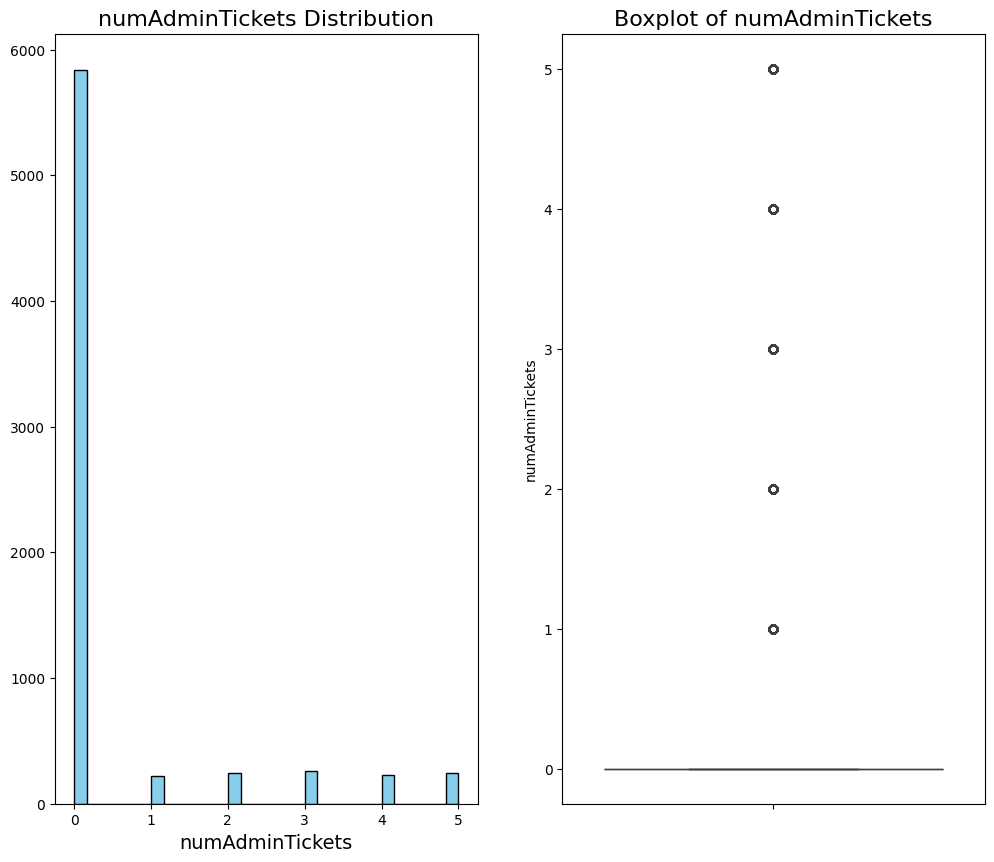

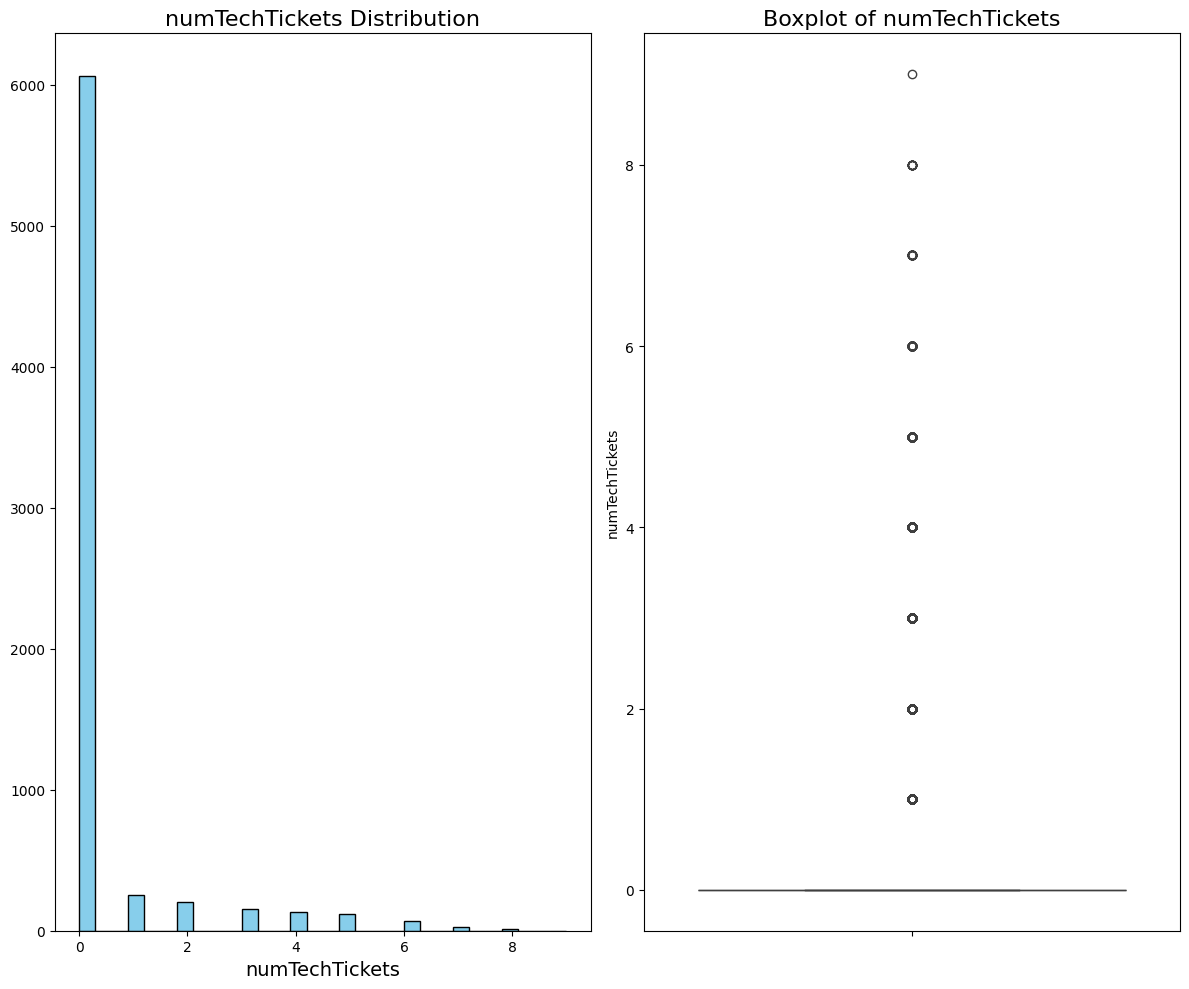

In [49]:
for col in num_cols:
  fig, axs = plt.subplots(1, 2, figsize=(12, 10))

  axs[0].hist(telco_df[col], bins=30, color='skyblue', edgecolor='black')
  axs[0].set_xlabel(col, fontsize=14)
  axs[0].set_title(f'{col} Distribution', fontsize=16)

  sns.boxplot(y=col, data=telco_df, ax=axs[1])
  axs[1].set_title(f'Boxplot of {col}', fontsize=16)
  axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Featuer Selection and Engineer


In [62]:
# feature engineering
def engineered_features(df):
    df_new = df.copy()

    # Annual Categorical Variable from Tenure
    df_new.loc[(df_new["tenure"]>=0) & (df_new["tenure"]<=12),"NewTenureYear"] = "0-1 Year"
    df_new.loc[(df_new["tenure"]>12) & (df_new["tenure"]<=24),"NewTenureYear"] = "1-2 Year"
    df_new.loc[(df_new["tenure"]>24) & (df_new["tenure"]<=36),"NewTenureYear"] = "2-3 Year"
    df_new.loc[(df_new["tenure"]>36) & (df_new["tenure"]<=48),"NewTenureYear"] = "3-4 Year"
    df_new.loc[(df_new["tenure"]>48) & (df_new["tenure"]<=60),"NewTenureYear"] = "4-5 Year"
    df_new.loc[(df_new["tenure"]>60) & (df_new["tenure"]<=72),"NewTenureYear"] = "5-6 Year"


    # Total Services
    df_new["TotalServices"] = df_new[["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup",
                              "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].apply(lambda x:(x == "Yes").sum(), axis=1)


    # Churn Risk Score
    df_new["ChurnRiskScore"] = ((df_new["Contract"] == "Month-to-month").astype(int) * 3 +
                            (df_new["PaperlessBilling"] == "Yes").astype(int) * 2 +
                            (df_new["PaymentMethod"] == "Electronic check").astype(int) * 2 +
                            (df_new["TotalServices"] < 2).astype(int) * 2 +
                            (df_new["tenure"] < 12).astype(int) * 3)

    # Service Satisfaction Index
    df_new["ServiceSatisfactionIndex"] = df_new[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]].apply(lambda x: (x == "Yes").sum(), axis=1)

    # Engagement Score
    df_new["EngagementScore"] = df_new[["StreamingTV", "StreamingMovies"]].apply(lambda x: (x == "Yes").sum(), axis=1
                            ) + (df_new["InternetService"] != "No").astype(int) * 2 + (df_new["PhoneService"] == "Yes").astype(int)

    # Family Status
    df_new["FamilyStatus"] = ((df_new["Partner"] == "Yes") & (df_new["Dependents"] == "Yes")).astype(int)


    # Service Adoption Speed
    df_new["ServiceAdoptionSpeed"] = df_new["TotalServices"] / df_new["tenure"]

    # Contract Commitment Level
    df_new["ContractCommitmentLevel"] = df_new["Contract"].map({"Month-to-month": 1, "One year": 12, "Two year": 24})

    # Payment Reliability
    df_new["PaymentReliability"] = (df_new["PaymentMethod"].isin(["Bank transfer (automatic)", "Credit card (automatic)"])).astype(int)

    # Service Value Ratio
    df_new["ServiceValueRatio"] = df_new["TotalServices"] / df_new["MonthlyCharges"]


    df_new.rename(columns={"tenure": "Tenure"}, inplace=True)

    return df_new

df_new_feature = engineered_features(telco_df)

df_new_feature.head()


,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,NewTenureYear,TotalServices,ChurnRiskScore,ServiceSatisfactionIndex,EngagementScore,FamilyStatus,ServiceAdoptionSpeed,ContractCommitmentLevel,PaymentReliability,ServiceValueRatio
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,0-1 Year,1,12,1,2,0,1.000000,1,0,0.033501
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,2-3 Year,3,0,2,3,0,0.088235,12,0,0.052678
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,0-1 Year,3,8,2,3,0,1.500000,1,0,0.055710
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,3-4 Year,3,0,3,2,0,0.066667,12,1,0.070922
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,0-1 Year,1,12,0,3,0,0.500000,1,0,0.014144


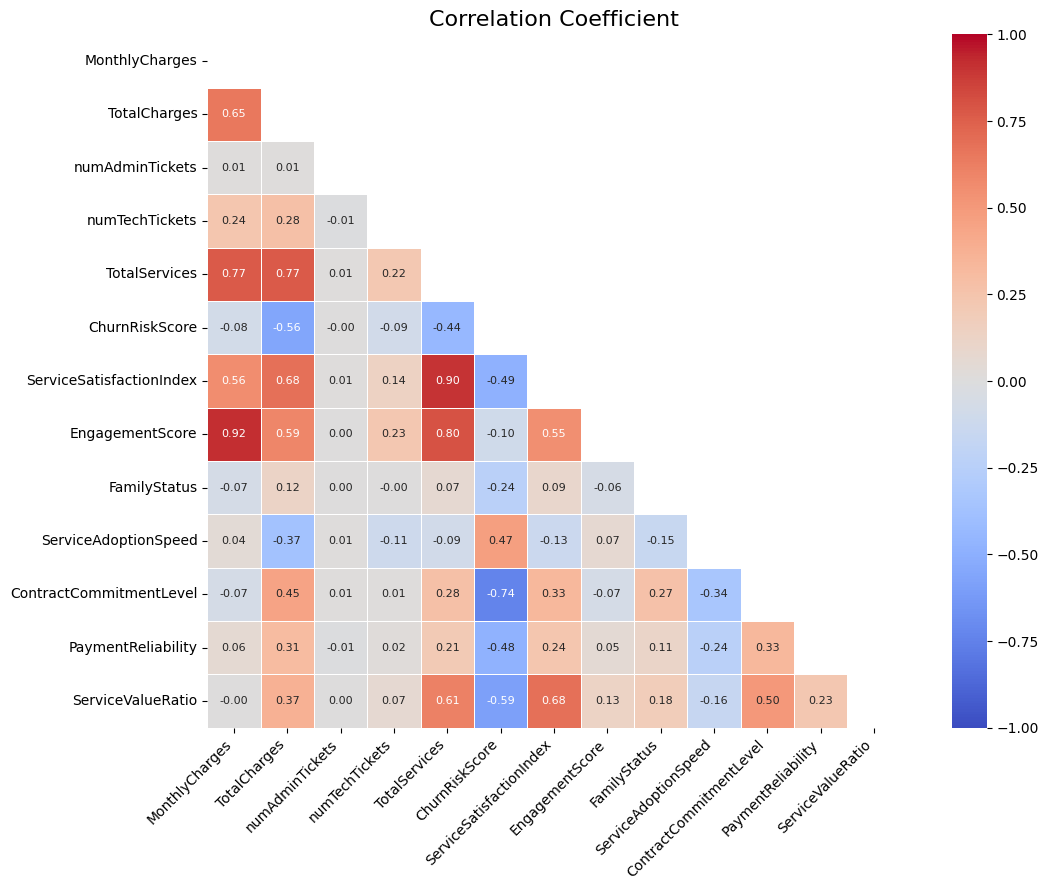

In [63]:
numerical_cols = [col for col in df_new_feature.columns if df_new_feature[col].dtype in ['int64', 'float64'] and col != 'Tenure']

numerical_df = df_new_feature.loc[:, numerical_cols]

plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))

sns.heatmap(numerical_df.corr().round(2), annot=True, mask=mask,
            vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 8},
            cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Coefficient', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
drop_list = [ 'TotalServices','EngagementScore']
df_new_feature = df_new_feature.drop(drop_list, axis = 1)

### Data Processing

In [66]:
df_new_feature.dtypes

gender                       object
SeniorCitizen                object
Partner                      object
Dependents                   object
Tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
Contract                     object
PaperlessBilling             object
PaymentMethod                object
MonthlyCharges              float64
TotalCharges                float64
numAdminTickets               int64
numTechTickets                int64
Churn                        object
NewTenureYear                object
ChurnRiskScore                int64
ServiceSatisfactionIndex      int64
FamilyStatus                  int64
ServiceAdoptionSpeed        float64
ContractCommitmentLevel     

In [67]:
# 1. encode binary features
df_new_feature['SeniorCitizen'] =df_new_feature['SeniorCitizen'].map({1: "Yes", 0: "No"})

In [68]:
df_new_feature['FamilyStatus'] = df_new_feature['FamilyStatus'].map({0: 'No', 1: 'Yes'})

In [69]:
df_new_feature['Churn'] = df_new_feature['Churn'].map({'No': 0, 'Yes': 1})

In [70]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dtype=int, drop_first=drop_first)
    return dataframe


In [93]:
# 2. one hot encoding
df = df_new_feature.copy()
cat_cols, num_cols = grab_col(df)
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,Tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,ContractCommitmentLevel,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NewTenureYear_1-2 Year,NewTenureYear_2-3 Year,NewTenureYear_3-4 Year,NewTenureYear_4-5 Year,NewTenureYear_5-6 Year,FamilyStatus_Yes
0,1,29.85,29.85,0,0,0,12,1,1.000000,1,...,1,0,1,0,0,0,0,0,0,0
1,34,56.95,1889.50,0,0,0,0,2,0.088235,12,...,0,0,0,1,0,1,0,0,0,0
2,2,53.85,108.15,0,0,1,8,2,1.500000,1,...,1,0,0,1,0,0,0,0,0,0
3,45,42.30,1840.75,0,3,0,0,3,0.066667,12,...,0,0,0,0,0,0,1,0,0,0
4,2,70.70,151.65,0,0,1,12,0,0.500000,1,...,1,0,1,0,0,0,0,0,0,0


In [94]:
df[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,ContractCommitmentLevel,PaymentReliability,ServiceValueRatio
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785,5.051052,1.265358,0.285081,8.813851,0.435580,0.045397
std,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782,3.302436,1.286277,0.493678,9.541690,0.495868,0.017056
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,2.000000,0.000000,0.062500,1.000000,0.000000,0.034985
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,5.000000,1.000000,0.100000,1.000000,0.000000,0.047893
75%,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000,8.000000,2.000000,0.242500,12.000000,1.000000,0.054348
max,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000,12.000000,4.000000,5.000000,24.000000,1.000000,0.096000


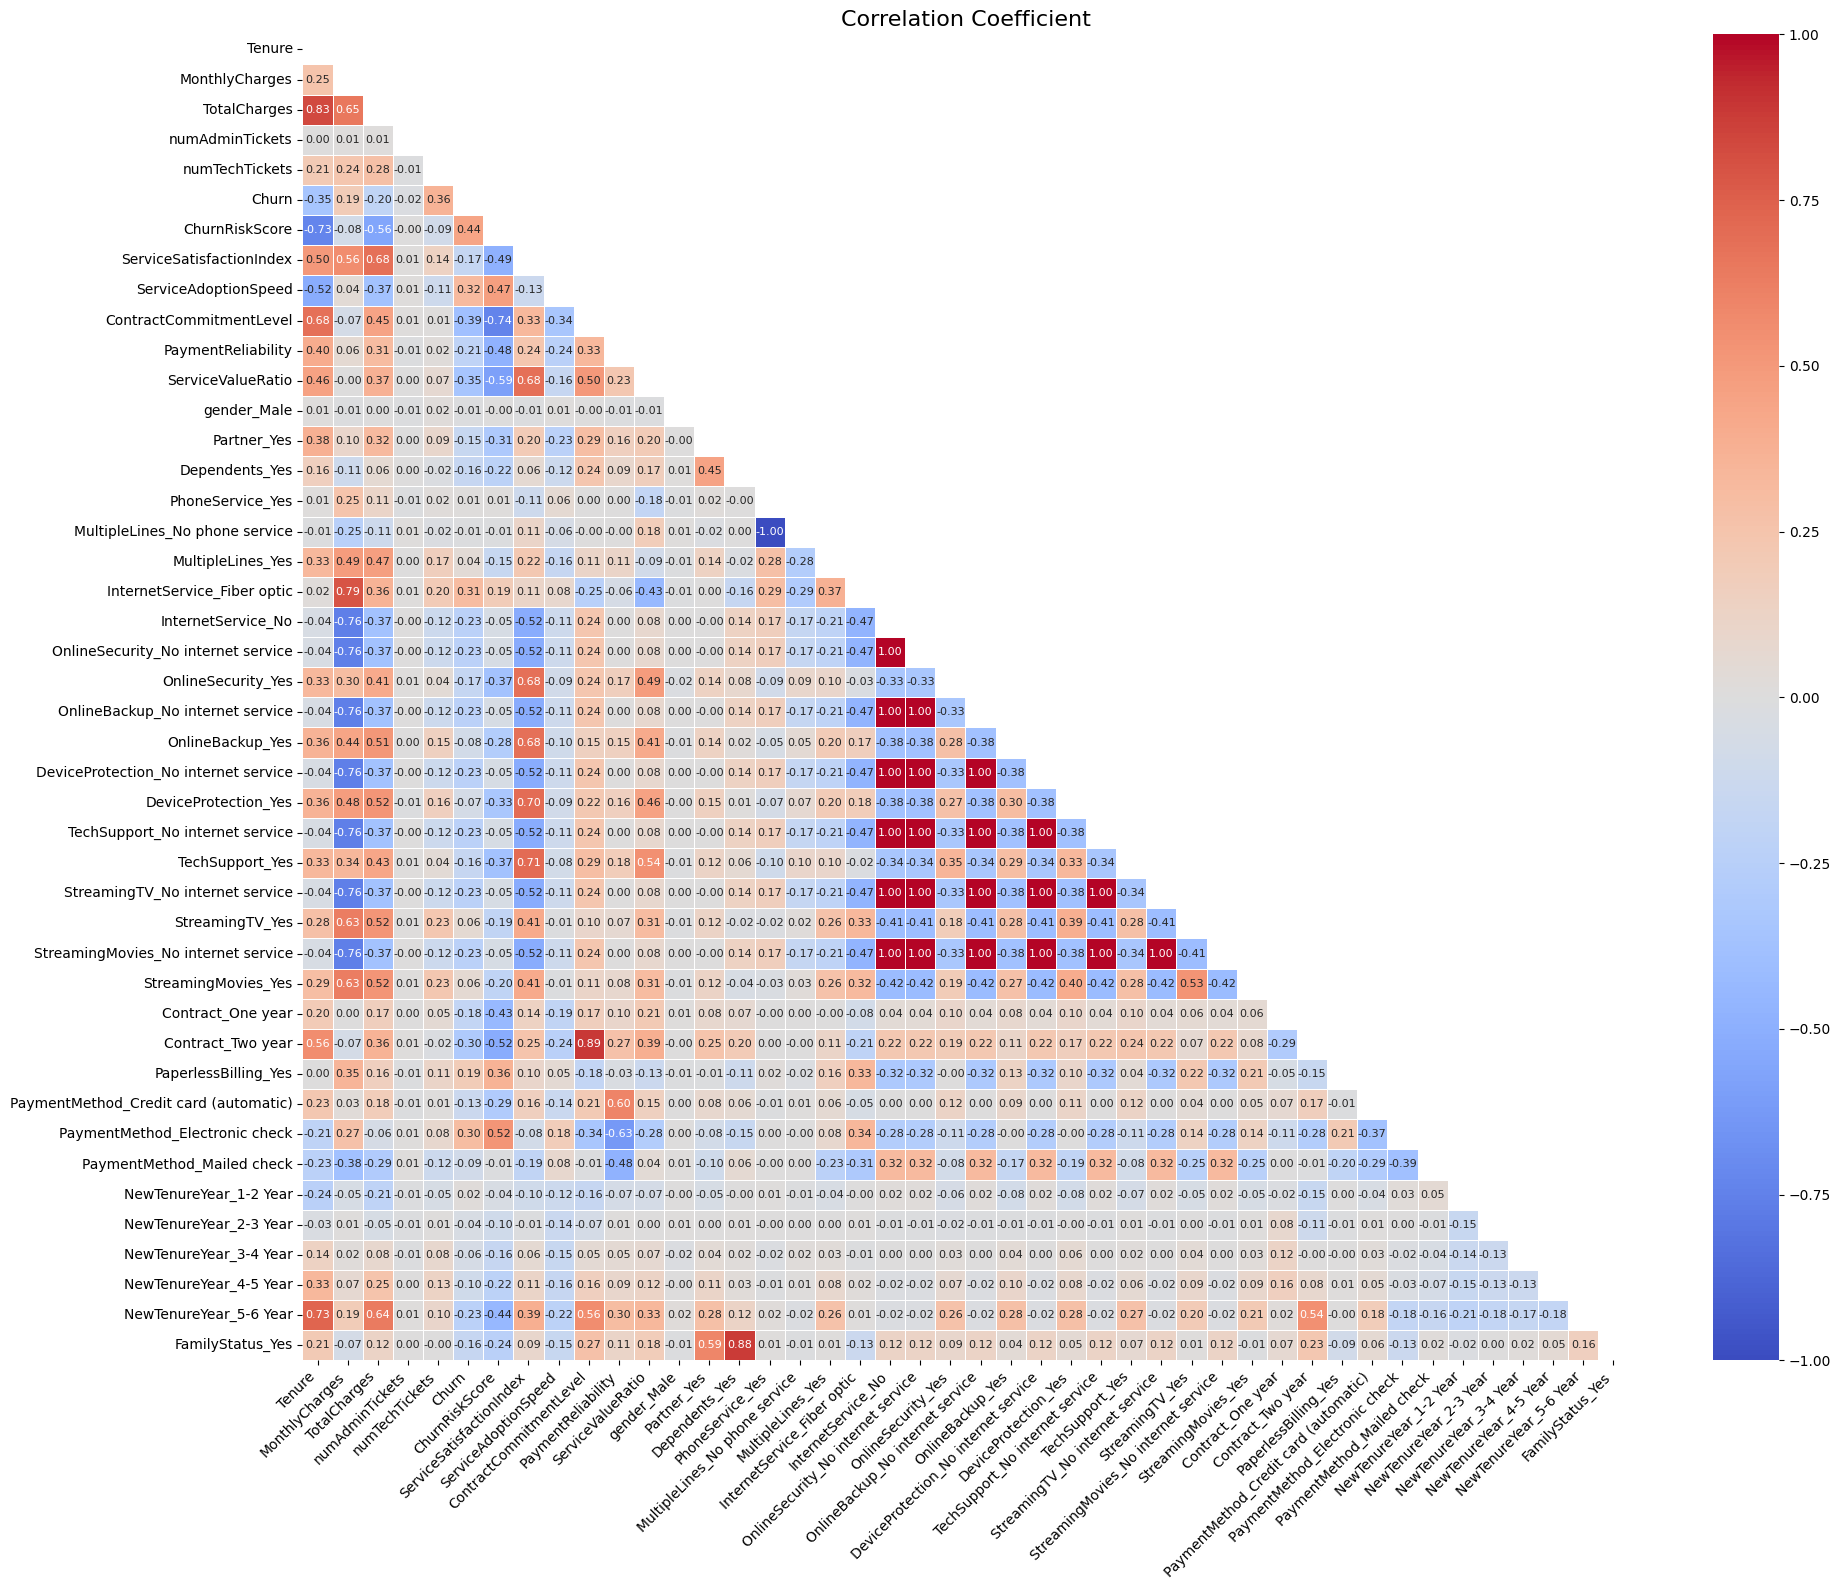

In [73]:

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr().round(2), annot=True, mask=mask,
            vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 8},
            cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Coefficient', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [95]:
# drop uncessary features
# drop correlated features

drop_cols = ['TotalCharges', 'StreamingMovies_No internet service', 'StreamingTV_No internet service', 'TechSupport_No internet service',
                'OnlineBackup_No internet service','OnlineSecurity_No internet service', 'DeviceProtection_No internet service','MultipleLines_No phone service', 'FamilyStatus_Yes',
                  'ContractCommitmentLevel', 'EngagementScore']
for col in drop_cols:
  if col in df.columns:
    df.drop(col, axis=1, inplace=True)
#df_scaled = df_scaled.drop(drop_cols,  axis=1)

In [96]:
#3. scale feature
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()
for col in ['MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'ChurnRiskScore', 'ServiceSatisfactionIndex', 'ServiceAdoptionSpeed',
            'PaymentReliability', 'ServiceValueRatio']:
            if col != 'Churn':
              df_scaled[col] = scaler.fit_transform(df_scaled[[col]])
df_scaled.head()

,Tenure,MonthlyCharges,numAdminTickets,numTechTickets,Churn,ChurnRiskScore,ServiceSatisfactionIndex,ServiceAdoptionSpeed,PaymentReliability,ServiceValueRatio,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NewTenureYear_1-2 Year,NewTenureYear_2-3 Year,NewTenureYear_3-4 Year,NewTenureYear_4-5 Year,NewTenureYear_5-6 Year
0,1,-1.161694,-0.404239,-0.335937,0,2.104338,-0.206314,1.448252,-0.878482,-0.697518,...,0,1,0,1,0,0,0,0,0,0
1,34,-0.260878,-0.404239,-0.335937,0,-1.529602,0.571179,-0.398762,-0.878482,0.426904,...,0,0,0,0,1,0,1,0,0,0
2,2,-0.363923,-0.404239,-0.335937,1,0.893025,0.571179,2.461130,-0.878482,0.604713,...,0,1,0,0,1,0,0,0,0,0
3,45,-0.747850,-0.404239,2.062345,0,-1.529602,1.348672,-0.442455,1.138327,1.496635,...,0,0,0,0,0,0,0,1,0,0
4,2,0.196178,-0.404239,-0.335937,1,2.104338,-0.983807,0.435373,-0.878482,-1.832472,...,0,1,0,1,0,0,0,0,0,0


### ML Model

#### Logistic Regression

In [97]:
y = pd.to_numeric(df["Churn"])
X = df.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
y_train = y_train.ravel()
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8479033404406539
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1033
           1       0.73      0.69      0.71       374

    accuracy                           0.85      1407
   macro avg       0.81      0.80      0.80      1407
weighted avg       0.85      0.85      0.85      1407



In [101]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[936,  97],
       [117, 257]])

### Reduce redundant columns

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)

                                  feature         VIF
0                                  Tenure   64.006803
1                          MonthlyCharges  901.823478
2                         numAdminTickets    1.003192
3                          numTechTickets    1.165471
4                          ChurnRiskScore   36.483680
5                ServiceSatisfactionIndex         inf
6                    ServiceAdoptionSpeed    1.970877
7                      PaymentReliability  445.327494
8                       ServiceValueRatio   15.255076
9                             gender_Male    1.005285
10                            Partner_Yes    1.462074
11                         Dependents_Yes    1.338874
12                       PhoneService_Yes   36.230624
13                      MultipleLines_Yes    7.351303
14            InternetService_Fiber optic  149.876225
15                     InternetService_No  106.536128
16                     OnlineSecurity_Yes         inf
17                       Onl

In [105]:
features_to_remove = [
    'ServiceSatisfactionIndex', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
    'DeviceProtection_Yes', 'TechSupport_Yes', 'Contract_One year',
    'Contract_Two year', 'MonthlyCharges', 'PaymentReliability',
    'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'Tenure', 'ChurnRiskScore'
]

X_train_cleaned = X_train.drop(columns=features_to_remove)


In [108]:
import statsmodels.api as sm

logit_model_cleaned = sm.Logit(y_train, X_train_cleaned)
result_cleaned = logit_model_cleaned.fit()
print(result_cleaned.summary())

Optimization terminated successfully.
         Current function value: 0.316272
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5607
Method:                           MLE   Df Model:                           17
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                  0.4538
Time:                        06:21:53   Log-Likelihood:                -1779.0
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
numAdminTickets                          -0.0216      

In [110]:
drop_list = ['gender_Male', 'Partner_Yes', 'PhoneService_Yes']
X_train = X_train_cleaned.drop(drop_list, axis =1 )

In [115]:
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8479033404406539
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1033
           1       0.73      0.69      0.71       374

    accuracy                           0.85      1407
   macro avg       0.81      0.80      0.80      1407
weighted avg       0.85      0.85      0.85      1407



### Random Forest

In [120]:
y = pd.to_numeric(df["Churn"])
X = df.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred = rf.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8386638237384506


In [123]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0725d500d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f072600b5b0>})

In [125]:
best_rf = rand_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=10, n_estimators=298)

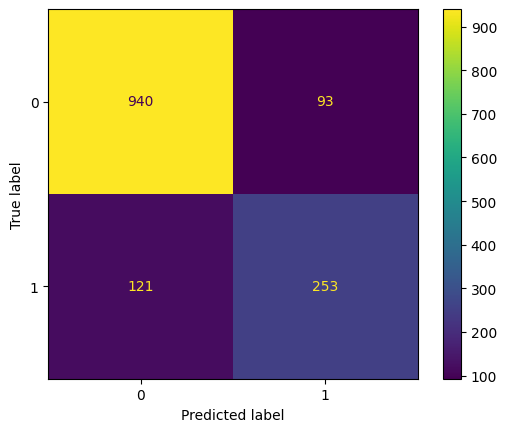

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [139]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8479033404406539
Precision: 0.7312138728323699
Recall: 0.6764705882352942


In [140]:
feature_list = list(X_train.columns)

([<matplotlib.axis.XTick at 0x7f0723e4a1d0>,
 [Text(0, 0, 'Tenure'),
  Text(1, 0, 'MonthlyCharges'),
  Text(2, 0, 'numAdminTickets'),
  Text(3, 0, 'numTechTickets'),
  Text(4, 0, 'ChurnRiskScore'),
  Text(5, 0, 'ServiceSatisfactionIndex'),
  Text(6, 0, 'ServiceAdoptionSpeed'),
  Text(7, 0, 'PaymentReliability'),
  Text(8, 0, 'ServiceValueRatio'),
  Text(9, 0, 'gender_Male'),
  Text(10, 0, 'Partner_Yes'),
  Text(11, 0, 'Dependents_Yes'),
  Text(12, 0, 'PhoneService_Yes'),
  Text(13, 0, 'MultipleLines_Yes'),
  Text(14, 0, 'InternetService_Fiber optic'),
  Text(15, 0, 'InternetService_No'),
  Text(16, 0, 'OnlineSecurity_Yes'),
  Text(17, 0, 'OnlineBackup_Yes'),
  Text(18, 0, 'DeviceProtection_Yes'),
  Text(19, 0, 'TechSupport_Yes'),
  Text(20, 0, 'StreamingTV_Yes'),
  Text(21, 0, 'StreamingMovies_Yes'),
  Text(22, 0, 'Contract_One year'),
  Text(23, 0, 'Contract_Two year'),
  Text(24, 0, 'PaperlessBilling_Yes'),
  Text(25, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(26, 0, 'Paymen

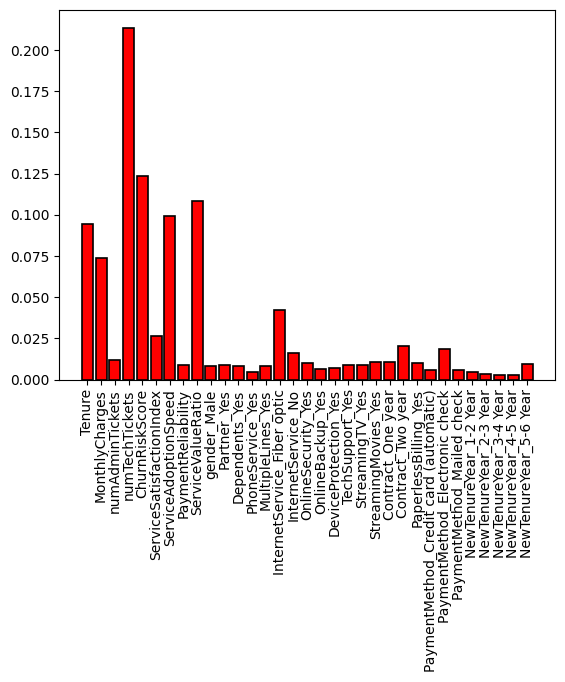

In [153]:
importances = list(best_rf.feature_importances_)
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')

In [142]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, threshold=0.01)
features_important = selector.fit_transform(X_train, y_train)

In [146]:
X_test_important = selector.transform(X_test)

In [150]:
feature_importance_rf = rf.fit(features_important, y_train)

In [151]:
y_pred = feature_importance_rf.predict(X_test_important)

In [152]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8407960199004975
Precision: 0.711864406779661
Recall: 0.6737967914438503
